<a href="https://colab.research.google.com/github/CarlosEduardoPontes/fastpage/blob/master/_notebooks/2022-07-10_EDA_Calculadora_de_Aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA dos dados coletados web scraping - Calculadora de alugel

*   Item da lista
*   Item da lista









In [56]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [160]:
df = pd.read_excel('calculadora.xlsx')

In [161]:
df.head(4)

,endereco,metragem,quartos,banheiros,vagas,precos
0,"rua frança pinto, 1253 - vila mariana, são pau...",80,2,2,2,3850
1,"rua das grumixamas, 253 - vila parque jabaquar...",55,2,2,2,2020
2,"rua caio prado, 247 - consolação, são paulo - sp",35,1,1,1,2700
3,"rua monte aprazível, 109 - vila nova conceição...",32,2,2,2,2800


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   endereco   36 non-null     object
 1   metragem   36 non-null     int64 
 2   quartos    36 non-null     int64 
 3   banheiros  36 non-null     int64 
 4   vagas      36 non-null     int64 
 5   precos     36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
metragem,36.0,64.805556,31.558399,26.0,44.50,54.5,75.5,136.0
quartos,36.0,1.444444,0.652225,1.0,1.00,1.0,2.0,3.0
banheiros,36.0,1.444444,0.652225,1.0,1.00,1.0,2.0,3.0
vagas,36.0,1.416667,0.691789,0.0,1.00,1.0,2.0,3.0
precos,36.0,4056.805556,3807.680087,881.0,2191.75,3150.0,3812.5,22000.0


In [173]:
treino, teste = train_test_split(df, 
                                 stratify=df['quartos'], 
                                 test_size=0.25,
                                 random_state=0
                                 )

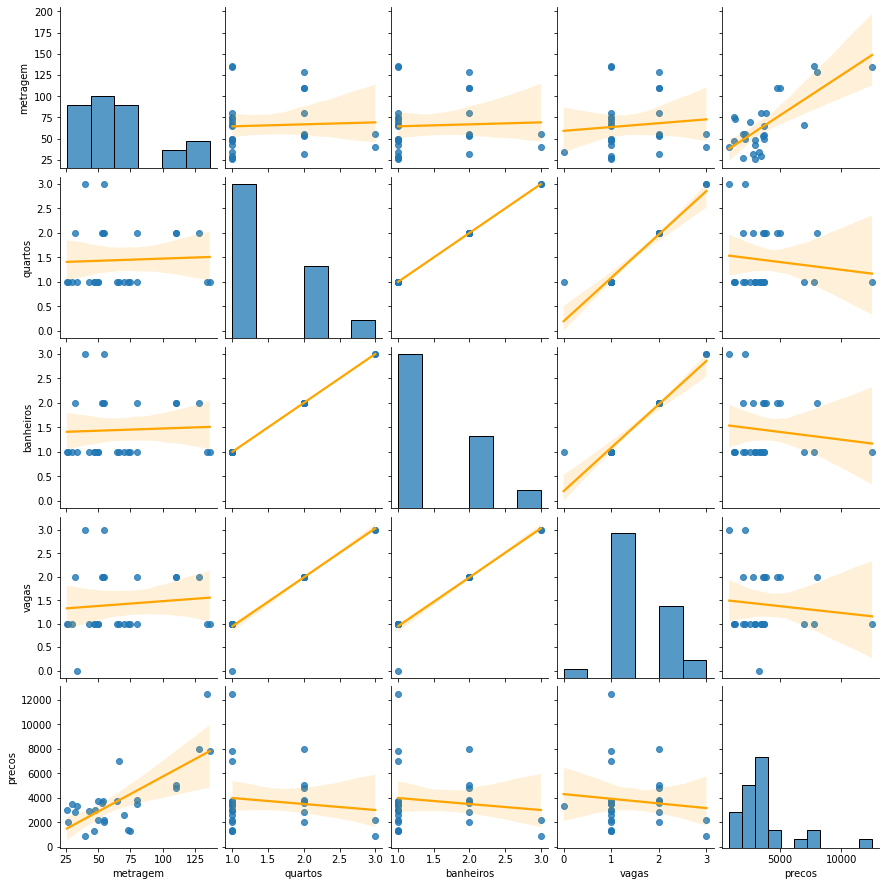

In [171]:
sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

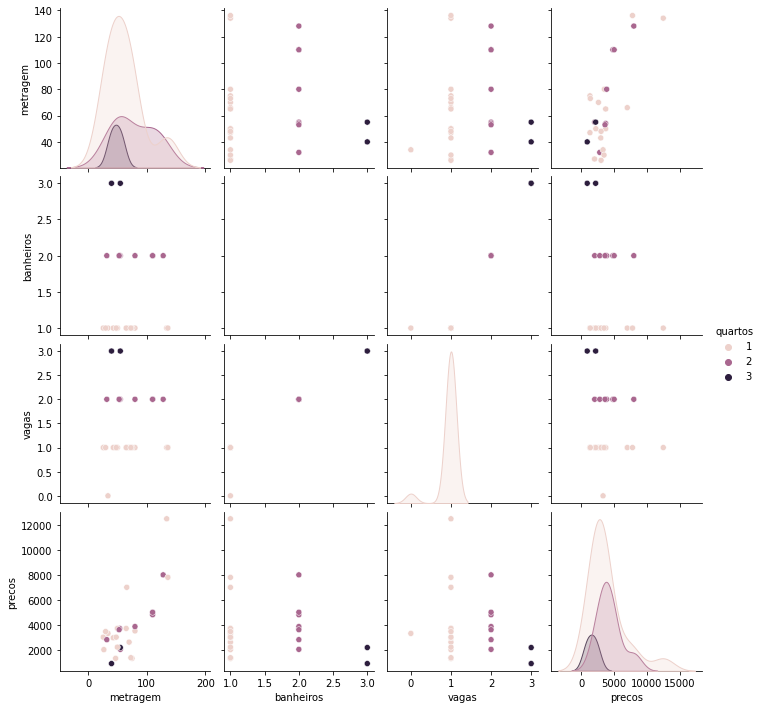

In [174]:
sns.pairplot(treino, hue='quartos')

In [175]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   endereco   27 non-null     object
 1   metragem   27 non-null     int64 
 2   quartos    27 non-null     int64 
 3   banheiros  27 non-null     int64 
 4   vagas      27 non-null     int64 
 5   precos     27 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


#Tratamento dos dados

In [189]:
num_cols = ['metragem', 'quartos','banheiros','vagas','precos']
treino_num = treino[num_cols]

In [190]:
treino_medianas = treino_num.median()
treino_num = treino_num.fillna(treino_medianas)
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 34
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   metragem   27 non-null     int64
 1   quartos    27 non-null     int64
 2   banheiros  27 non-null     int64
 3   vagas      27 non-null     int64
 4   precos     27 non-null     int64
dtypes: int64(5)
memory usage: 2.3 KB


In [191]:
import numpy as np
treino_num=treino_num.apply(np.log1p)

In [192]:
treino[num_cols] = treino_num

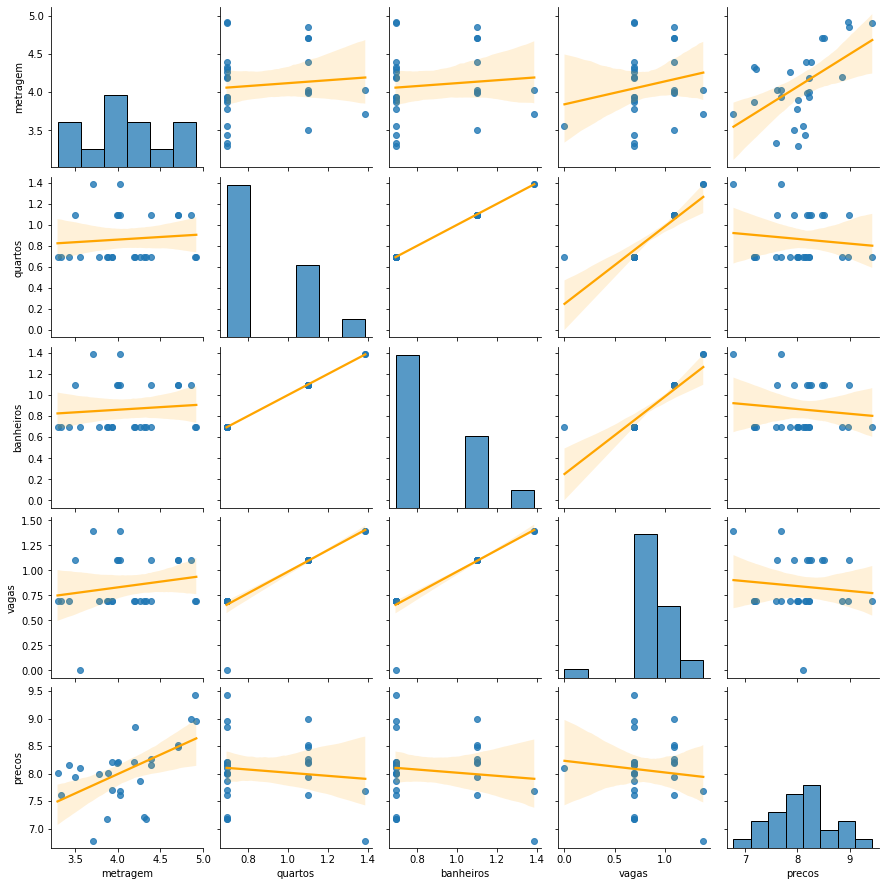

In [193]:
sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

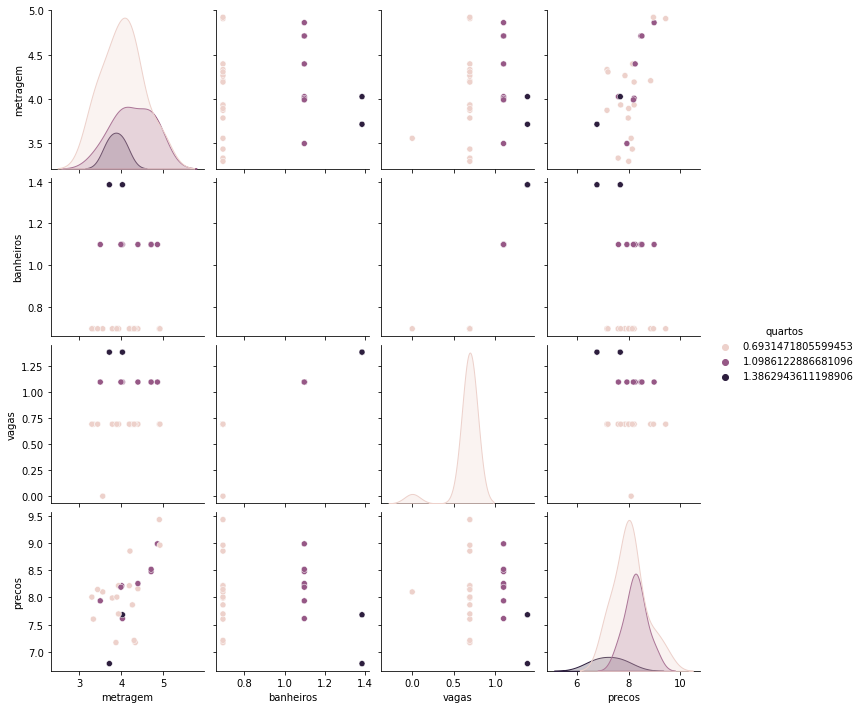

In [194]:
sns.pairplot(treino, hue='quartos')

In [195]:
REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
  treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,metragem,quartos,banheiros,vagas,precos
1,4.025352,1.098612,1.098612,1.098612,7.611348
12,4.262680,0.693147,0.693147,0.693147,7.863651
28,4.007333,1.098612,1.098612,1.098612,8.216358
5,3.931826,0.693147,0.693147,0.693147,8.216358
17,3.332205,0.693147,0.693147,0.693147,7.601402
7,3.871201,0.693147,0.693147,0.693147,7.170120
31,4.394449,0.693147,0.693147,0.693147,8.160804
29,3.295837,0.693147,0.693147,0.693147,8.006701
3,3.496508,1.098612,1.098612,1.098612,7.937732
22,3.784190,0.693147,0.693147,0.693147,7.989899


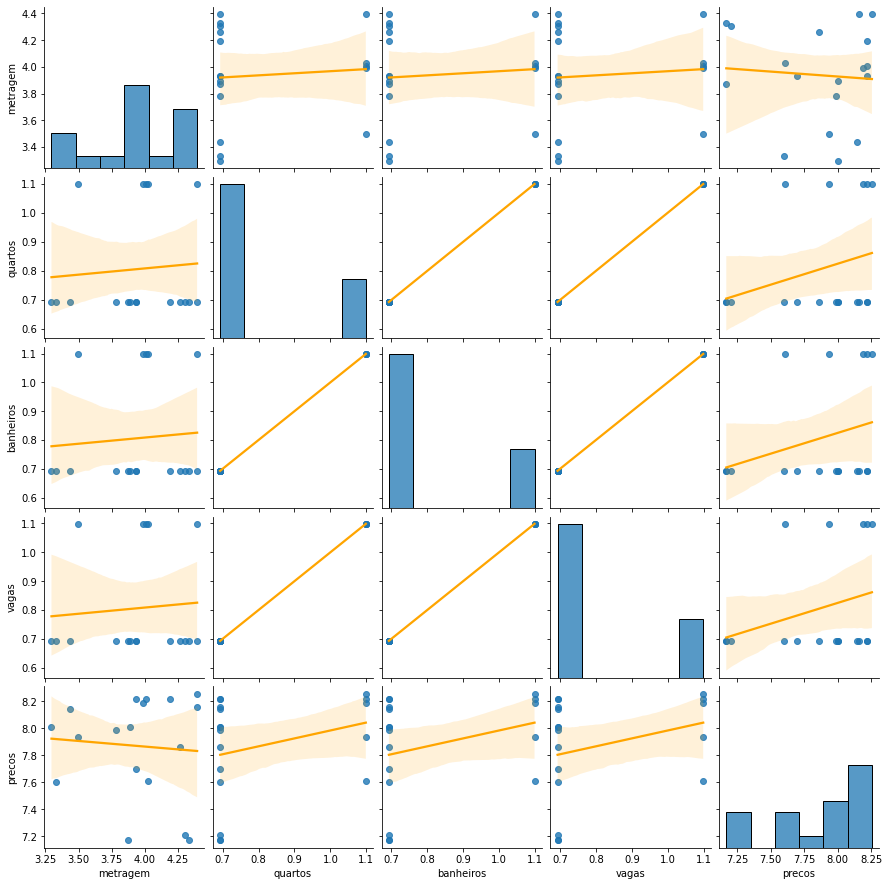

In [196]:
sns.pairplot(treino_num_sem_outlier, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

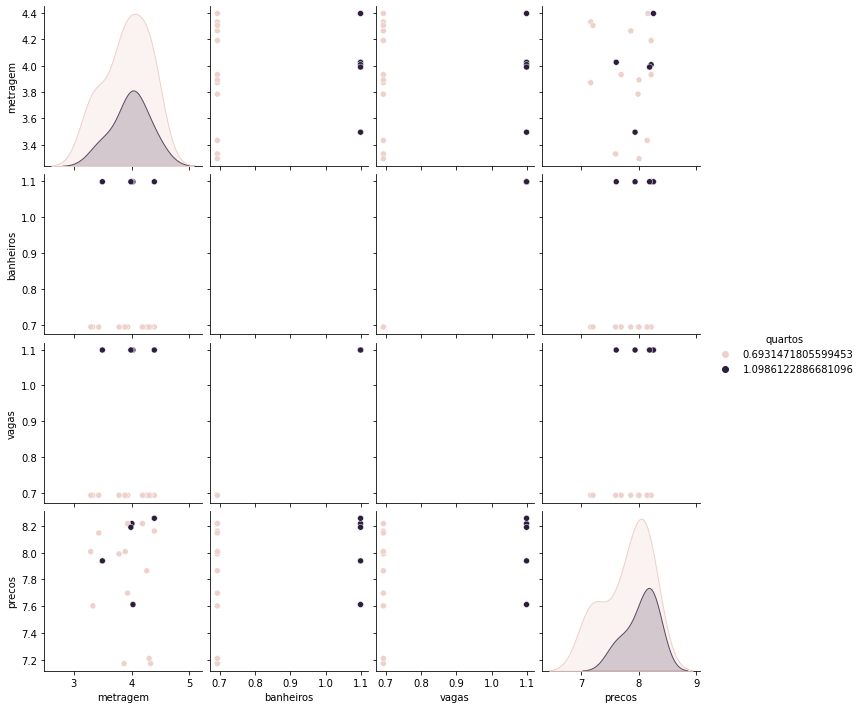

In [199]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='quartos')

# Colunas categóricas

In [200]:
cat_cols = ['quartos']
treino_cat = treino[cat_cols]

In [201]:
# Vantagem de get_dummies: Lida automaticamente com NaNs (todos zeros)
treino_cat = pd.get_dummies(treino_cat)

In [202]:
treino = pd.concat([treino_cat, treino.drop(cat_cols, axis=1)], axis=1)

In [203]:
treino.head()

,quartos,endereco,metragem,banheiros,vagas,precos
1,1.098612,"rua das grumixamas, 253 - vila parque jabaquar...",4.025352,1.098612,1.098612,7.611348
23,1.098612,"avenida higienópolis - higienópolis, são paulo...",4.709530,1.098612,1.098612,8.476580
24,1.386294,"rua paulo de avelar, 571 - parada inglesa, são...",3.713572,1.386294,1.386294,6.782192
27,1.386294,"avenida cipriano rodrigues, 340 - vila formosa...",4.025352,1.386294,1.386294,7.681560
12,0.693147,"avenida marquês de são vicente, 2898 - barra f...",4.262680,0.693147,0.693147,7.863651


In [204]:
teste = teste.fillna(treino_medianas)
teste.head()

,endereco,metragem,quartos,banheiros,vagas,precos
16,"rua diogo jácome, 518 - vila nova conceição, s...",134,1,1,1,22000
10,"rua herculano de freitas, 131 - bela vista, sã...",38,1,1,1,1600
20,"rua carolina fonseca, 407 - vila santana, são ...",49,1,1,1,1778
6,"praça júlio mesquita, 97 - santa ifigênia, são...",50,1,1,1,3300
2,"rua caio prado, 247 - consolação, são paulo - sp",35,1,1,1,2700


In [205]:
teste[num_cols] = teste[num_cols].apply(np.log1p)
teste.head()

,endereco,metragem,quartos,banheiros,vagas,precos
16,"rua diogo jácome, 518 - vila nova conceição, s...",4.905275,0.693147,0.693147,0.693147,9.998843
10,"rua herculano de freitas, 131 - bela vista, sã...",3.663562,0.693147,0.693147,0.693147,7.378384
20,"rua carolina fonseca, 407 - vila santana, são ...",3.912023,0.693147,0.693147,0.693147,7.483807
6,"praça júlio mesquita, 97 - santa ifigênia, são...",3.931826,0.693147,0.693147,0.693147,8.101981
2,"rua caio prado, 247 - consolação, são paulo - sp",3.583519,0.693147,0.693147,0.693147,7.901377


In [206]:
teste_onehot = pd.get_dummies(teste[cat_cols])
teste=pd.concat([teste_onehot, teste[num_cols]], axis=1)
teste.head()

,quartos,metragem,quartos,banheiros,vagas,precos
16,0.693147,4.905275,0.693147,0.693147,0.693147,9.998843
10,0.693147,3.663562,0.693147,0.693147,0.693147,7.378384
20,0.693147,3.912023,0.693147,0.693147,0.693147,7.483807
6,0.693147,3.931826,0.693147,0.693147,0.693147,8.101981
2,0.693147,3.583519,0.693147,0.693147,0.693147,7.901377


In [207]:
treino.to_csv('treino_preprocessado.csv', index=False)

In [208]:
teste.to_csv('teste_preprocessado.csv', index=False)